# STA414: HW4 Q2

**Date**: April 5, 2021  
**First Name**: Mahrukh  
**Last Name**: Niazi  
**Student Id**: 1003948204

In [1]:
import random
random.seed(1)

In [2]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Q2. Reinforcement Learning

There are 3 files:
1. `maze.py`: defines the `MazeEnv` class, the simulation environment which the Q-learning agent will interact in.
2. `qlearning.py`: defines the `qlearn` function which you will implement, along with several helper functions. Follow the instructions in the file. 
3. `plotting_utils.py`: defines several plotting and visualization utilities. In particular, you will use `plot_steps_vs_iters`, `plot_several_steps_vs_iters`, `plot_policy_from_q`

In [3]:
from qlearning import qlearn
from maze import MazeEnv, ProbabilisticMazeEnv
from plotting_utils import plot_steps_vs_iters, plot_several_steps_vs_iters, plot_policy_from_q

## 2.1. Basic Q Learning experiments

### 2.1 (a) Run your algorithm several times on the given environment. Use the following hyperparameters:
1. Number of episodes = 200
2. Alpha ($\alpha$) learning rate = 1.0
2. Maximum number of steps per episode = 100. An episode ends when the agent reaches a goal state, or uses the maximum number of steps per episode
3. Gamma ($\gamma$) discount factor = 0.9
4. Epsilon ($\epsilon$) for $\epsilon$-greedy = 0.1 (10% of the time). Note that we should "break-ties" when the Q-values are zero for all the actions (happens initially) by essentially choosing uniformly from the action. So now you have two conditions to act randomly: for epsilon amount of the time, or if the Q values are all zero. 


In [4]:
# TODO: Fill this in
num_iters = 200
alpha = 1.
gamma = .9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# TODO: Instantiate the MazeEnv environment with default arguments
env = MazeEnv()

# TODO: Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

Text(0.5, 1.0, 'Figure 1: Steps to goal vs episodes plot for 2.1(a)')

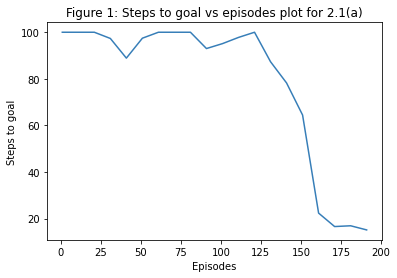

In [5]:
# TODO: Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)
plt.title("Figure 1: Steps to goal vs episodes plot for 2.1(a)")

Visualize the learned greedy policy from the Q values:

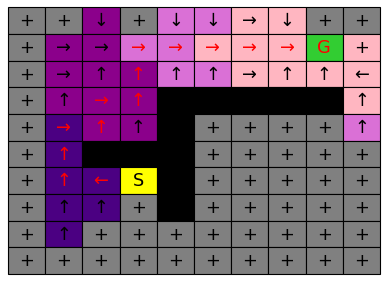

<Figure size 720x720 with 0 Axes>

In [6]:
# TODO: plot the policy from the Q value
plot_policy_from_q(q_hat, env)

### 2.1 (b) Run your algorithm by passing in a list of 2 goal locations: (1,8) and (5,6). Note: we are using 0-indexing, where (0,0) is top left corner. Report on the results.

In [7]:
# TODO: Fill this in (same as before)
num_iters = 200
alpha = 1.
gamma = .9
epsilon = .1
max_steps = 100
use_softmax_policy = False

# TODO: Set the goal
goal_locs = [(1,8), (5,6)]
env = MazeEnv(goals=goal_locs)

# TODO: Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

Text(0.5, 1.0, 'Figure 2: Steps to goal vs episodes plot for 2.1(b)')

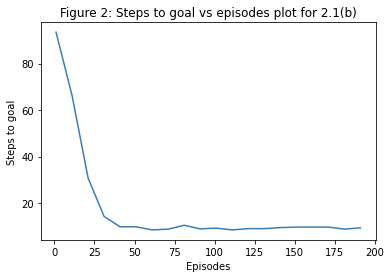

In [8]:
# TODO: Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)
plt.title("Figure 2: Steps to goal vs episodes plot for 2.1(b)")

Plot the steps to goal vs training iterations (episodes):

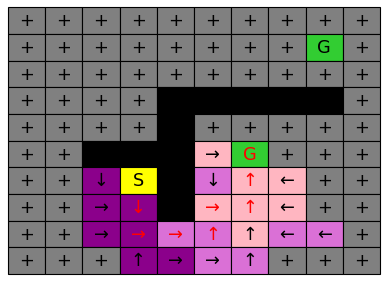

<Figure size 720x720 with 0 Axes>

In [9]:
# TODO: plot the policy from the Q values
plot_policy_from_q(q_hat, env)

## 2.2 Experiment with the exploration strategy, in the original environment

### 2.2 (a) Try different $\epsilon$ values in $\epsilon$-greedy exploration: We asked you to use a rate of $\epsilon$=10%, but try also 50% and 1%. Graph the results (for 3 epsilon values) and discuss the costs and benefits of higher and lower exploration rates.

In [10]:
# TODO: Fill this in (same as before)
num_iters = 200
alpha = 1.
gamma = .9
epsilon = .1
max_steps = 100
use_softmax_policy = False

# TODO: set the epsilon lists in increasing order:
epsilon_list = [.01,.1,.5]

env = MazeEnv()

steps_vs_iters_list = []
for epsilon in epsilon_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)
    steps_vs_iters_list.append(steps_vs_iters)

Text(0.5, 1.0, 'Figure 3: Steps to goal vs episodes plot for 2.2(a)')

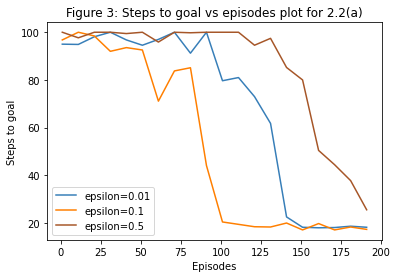

In [11]:
# TODO: Plot the results
label_list = ["epsilon={}".format(eps) for eps in epsilon_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)
plt.title("Figure 3: Steps to goal vs episodes plot for 2.2(a)")

### 2.2 (b) Try exploring with policy derived from **softmax of Q-values** described in the Q learning lecture. Use the values of $\beta \in \{1, 3, 6\}$ for your experiment, keeping $\beta$ fixed throughout the training.

In [12]:
# TODO: Fill this in for Static Beta with softmax of Q-values
num_iters = 200
alpha = 1.
gamma = .9
epsilon = .1
max_steps = 100

# TODO: Set the beta
beta_list = [1,3,6]
use_softmax_policy = True
k_exp_schedule = 0. # (float) choose k such that we have a constant beta during training

env = MazeEnv()
steps_vs_iters_list = []
for beta in beta_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, beta, k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

Text(0.5, 1.0, 'Figure 4: Steps to goal vs episodes plot for 2.2(b)')

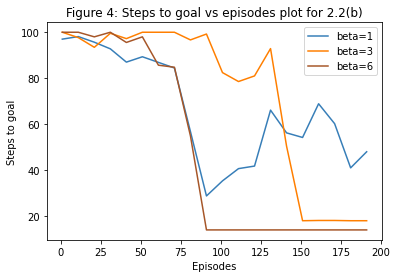

In [13]:
label_list = ["beta={}".format(beta) for beta in beta_list]
# TODO: 
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)
plt.title("Figure 4: Steps to goal vs episodes plot for 2.2(b)")

### 2.2 (c) Instead of fixing the $\beta = \beta_0$ to the initial value, we will increase the value of $\beta$ as the number of episodes $t$ increase:

$$\beta(t) = \beta_0 e^{kt}$$

### That is, the $\beta$ value is fixed for a particular episode.
### Run the training again for different values of $k \in \{0.05, 0.1, 0.25, 0.5\}$, keeping $\beta_0 = 1.0$. Compare the results obtained with this approach to those obtained with a static $\beta$ value.

In [14]:
# TODO: Fill this in for Dynamic Beta
num_iters = 200
alpha = 1.
gamma = .9
epsilon = .1
max_steps = 100

# TODO: Set the beta
beta = 1.0
use_softmax_policy = True
k_exp_schedule_list = [.05,.1,.25,.5]
env = MazeEnv()

steps_vs_iters_list = []
for k_exp_schedule in k_exp_schedule_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, beta, k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

Text(0.5, 1.0, 'Figure 5: Steps to goal vs episodes plot for 2.2(c)')

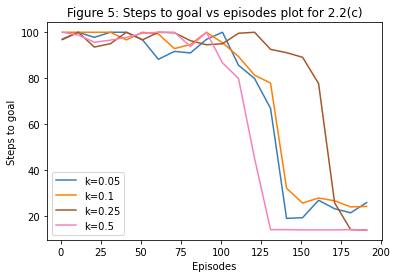

In [15]:
# TODO: Plot the steps vs iterations
label_list = ["k={}".format(k_exp_schedule) for k_exp_schedule in k_exp_schedule_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)
plt.title("Figure 5: Steps to goal vs episodes plot for 2.2(c)")

## 2.3 Stochastic Environments

### 2.3 (a) Make  the  environment  stochastic  (uncertain),  such  that  the  agent  only  has  a  95% chance  of  moving  in  the  chosen  direction,  and  has  a  5%  chance  of  moving  in  some random direction.

In [16]:
# TODO: Implement ProbabilisticMazeEnv in maze.py
from maze import ProbabilisticMazeEnv

### 2.3 (b) Change the learning rule to handle the non-determinism, and experiment with different probability of environment performing random action $p_{rand} \in \{0.05, 0.1, 0.25, 0.5\}$ in this new rule. How does performance vary as the environment becomes more stochastic?

### Use the same parameters as in first part, except change the alpha ($\alpha$) value to be **less than 1**, e.g. 0.5.

In [17]:
# TODO: Use the same parameters as in the first part, except change alpha
num_iters = 200
alpha = .5
gamma = .9
epsilon = .1
max_steps = 100
use_softmax_policy = False

# Set the environment probability of random
env_p_rand_list = [.05,.1,.25,.5]

steps_vs_iters_list = []
for env_p_rand in env_p_rand_list:
    # Instantiate with ProbabilisticMazeEnv
    env = ProbabilisticMazeEnv(MazeEnv(), p_random=env_p_rand)

    # Note: We will repeat for several runs of the algorithm to make the result less noisy
    avg_steps_vs_iters = np.zeros(num_iters)
    for i in range(10):
        q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)
        avg_steps_vs_iters += steps_vs_iters
    avg_steps_vs_iters /= 10
    steps_vs_iters_list.append(avg_steps_vs_iters)

Text(0.5, 1.0, 'Figure 6: Steps to goal vs episodes plot for 2.3(b)')

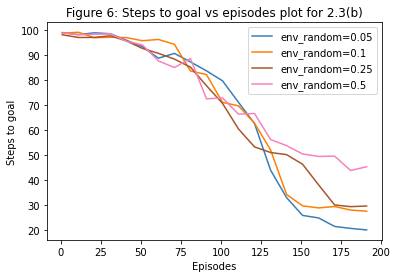

In [18]:
label_list = ["env_random={}".format(env_p_rand) for env_p_rand in env_p_rand_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)
plt.title("Figure 6: Steps to goal vs episodes plot for 2.3(b)")

## 2.4 Write-up

**Section 2.1**

For this question I implemented a Q-learning reinforcement learning algorithm with an epsilon-greedy exploration strategy in order to find the shortest past from the starting point to the goal point in a maze. For this alogrithm, the agent continually interacts with the environment, updates its knowledge of the world and its policy accordingly, and has a goal of achieving as much rewards as possible. In this maze setting, the goal of the agent is to learn a strategy to navigate from its start position to the goal position efficiently while avoiding obstacles in the maze. In Q-learning, the state, action, and reward are sampled randomly and an optimal path from start to goal is found by maximizing the earning point/reward. Q-learning estimates the optimal future value of reward from present state and action; ie the agent learns the best action to take for every state it is in (the policy). An action is a direction to move (north, south, east and west) and a state is its position in the grid world. It essentially learns the shortest, obstacle-free path from its start position to the goal position. Epsilon-greedy exploration strategy refers to choosing the action with the higest estimated reward most of the time.

The Q-learning algorithm learns the policy by keeping a numeric value for each action-state pair. The numeric value is incrementally updated as the agent explores the maze through a series of trials. If the trail ends with the goal state, the numeric value is incremented, or if the trial ends at an obstacle, the numeric value is decremented. There is a small negative reward for each step to encourage the agent to find the shortest path.

In part 2.1(a), Figure 1 shows as the number of iterations increase, the number of steps to reach the goal decreases as the agent learns to find the shortest path, with less than 20 steps leading to the optimal solution. The policy plot for 2.1(a) shows that it took 14 steps to reach the goal.

In part 2.1(b), Figure 2 shows that it took a fewer number of iterations to reach the optimal solutions than that in 2.1(a).

**Section 2.2**

From Figure 3 in 2.2(a), we see that it takes fewer iterations to reach an optimal solution for larger epsilon values. It is possible that too large or small of a epsilon value may not converge (too large will take longer and too small may not converge). Thus the benefit of using a higher exploration rate (epsilon value of 0.1 in this case) is that the algorithm learns quicker. However, the cost of higher exploration rates is that the algorithm can get stuck at local optima since it will constantly choose the higher Q value for each state. This is due to the exploration-exploitation tradeoff: the agent should suboptimal actions (not the highest Q value each time) in order to visit new states and actions. We see that too high of an epsilon value (0.5) does take longer to converge than a moderate epsilon value (0.1). In contrast, the benefit of a lower exploration rate (epsilon value of 0.01 in this case) is that it will find a more optimal solution. The cost of lower exploration rates is that it may not converge or it takes a long time to converge.

In part 2.2(b), we use a softmax exploration strategy. In this exploration strategy, actions are chosen based on probabilities that are proportional to their current values. This makes it so there is more weight on better actions. In the case of the epsilon greedy learning strategy, all actions are weighted equally, which makes it possible to select an action that is considerably worse than the others. In Figure 4 we see that beta = 3 and beta = 6 converge. Larger beta values will result in more deterministic actions being chosen (ie higher Q values), whereas smaller beta values choose more exploratory actions that will lead to new states and actions.

From Figure 5 in part 2.2(c), we see that using a varying beta value has better convergence properties than a static beta. However, using too small of a k may not reach convergence and too large of a k takes more iterations to converge. In this plot we see that k = 0.05 converged the quickest and k = 0.5 did not converge.


**Section 2.3**

From Figure 6 we see that as the environment becomes more stochastic (ie env_random = 0.5), the algorithm takes longer to converge or does not converge. In the figure, the less stochastic environments (env_random = 0.05, env_random = 0.1, and env_random = 0.25) converged in similar number of iterations but the least stochastic environment (env_randoom = 0.5) decreased the quickest.

## Code for Q2 qlearning.py

In [19]:
import numpy as np
import math
import copy

def qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, init_beta=None, k_exp_sched=None):
    """ Runs tabular Q learning algorithm for stochastic environment.

    Args:
        env: instance of environment object 
        num_iters (int): Number of episodes to run Q-learning algorithm
        alpha (float): The learning rate between [0,1]
        gamma (float): Discount factor, between [0,1)
        epsilon (float): Probability in [0,1] that the agent selects a random move instead of 
                selecting greedily from Q value
        max_steps (int): Maximum number of steps in the environment per episode
        use_softmax_policy (bool): Whether to use softmax policy (True) or Epsilon-Greedy (False)
        init_beta (float): If using stochastic policy, sets the initial beta as the parameter for the softmax
        k_exp_sched (float): If using stochastic policy, sets hyperparameter for exponential schedule
            on beta
    
    Returns:
        q_hat: A Q-value table shaped [num_states, num_actions] for environment with with num_states 
            number of states (e.g. num rows * num columns for grid) and num_actions number of possible 
            actions (e.g. 4 actions up/down/left/right)
        steps_vs_iters: An array of size num_iters. Each element denotes the number 
            of steps in the environment that the agent took to get to the goal
            (capped to max_steps)
    """
    action_space_size = env.num_actions
    state_space_size = env.num_states
    q_hat = np.zeros(shape=(state_space_size, action_space_size))
    steps_vs_iters = np.zeros(num_iters)
    
    for i in range(num_iters):
        # TODO: Initialize current state by resetting the environment
        curr_state = env.reset()
        num_steps = 0
        done = False

        # TODO: Keep looping while environment isn't done and less than maximum steps
        while (not done and num_steps < max_steps):
            num_steps += 1

            # Choose an action using policy derived from either softmax Q-value 
            # or epsilon greedy
            if use_softmax_policy:
                assert(init_beta is not None)
                assert(k_exp_sched is not None)
                # TODO: Boltzmann stochastic policy (softmax policy)
                beta = beta_exp_schedule(init_beta, num_steps, k_exp_sched) # Call beta_exp_schedule to get the currentbeta value
                action = softmax_policy(q_hat, beta, curr_state)
            else:
                # TODO: Epsilon-greedy
                action = epsilon_greedy(q_hat, epsilon, curr_state, action_space_size)

            # TODO: Execute action in the environment and observe the next state, reward, and done flag
            next_state, reward, done = env.step(action)

            # TODO: Update Q_value
            if next_state != curr_state:
                new_value = alpha * (reward + gamma * np.max(q_hat[next_state,:]) - q_hat[curr_state, action])
                # TODO: Use Q-learning rule to update q_hat for the curr_state and action:
                # i.e., Q(s,a) <- Q(s,a) + alpha*[reward + gamma * max_a'(Q(s',a')) - Q(s,a)]
                q_hat[curr_state, action] = q_hat[curr_state, action] + new_value
                
                # TODO: Update the current staet to be the next state
                curr_state = next_state

        steps_vs_iters[i] = num_steps
    
    return q_hat, steps_vs_iters


def epsilon_greedy(q_hat, epsilon, state, action_space_size):
    """ Chooses a random action with p_rand_move probability,
    otherwise choose the action with highest Q value for
    current observation

    Args:
        q_hat: A Q-value table shaped [num_rows, num_col, num_actions] for 
            grid environment with num_rows rows and num_col columns and num_actions 
            number of possible actions
        epsilon (float): Probability in [0,1] that the agent selects a random 
            move instead of selecting greedily from Q value
        state: A 2-element array with integer element denoting the row and column
            that the agent is in
        action_space_size (int): number of possible actions
    
    Returns:
        action (int): A number in the range [0, action_space_size-1]
            denoting the action the agent will take
    """
    # TODO: Implement your code here
    # Hint: Sample from a uniform distribution and check if the sample is below
    # a certain threshold
    
    if np.random.uniform(0,1) < epsilon:
        return np.random.choice(action_space_size) 
    elif np.sum(q_hat[state,:]) == 0:
        return np.random.choice(action_space_size)
    else:
        return np.argmax(q_hat[state,:])
    

def softmax_policy(q_hat, beta, state):
    """ Choose action using policy derived from Q, using
    softmax of the Q values divided by the temperature.

    Args:
        q_hat: A Q-value table shaped [num_rows, num_col, num_actions] for 
            grid environment with num_rows rows and num_col columns
        beta (float): Parameter for controlling the stochasticity of the action
        obs: A 2-element array with integer element denoting the row and column
            that the agent is in

    Returns:
        action (int): A number in the range [0, action_space_size-1]
            denoting the action the agent will take
    """
    # TODO: Implement your code here
    # Hint: use the stable_softmax function defined below
    
    probability = stable_softmax(beta * q_hat, 1)
    actions = np.arange(q_hat.shape[1])
    
    return np.random.choice(actions, 1, p = probability[state,:])

def beta_exp_schedule(init_beta, iteration, k=0.1):
   beta = init_beta * np.exp(k * iteration)
   return beta

def stable_softmax(x, axis=2):
    """ Numerically stable softmax:
    softmax(x) = e^x /(sum(e^x))
               = e^x / (e^max(x) * sum(e^x/e^max(x)))
    
    Args:
        x: An N-dimensional array of floats
        axis: The axis for normalizing over.
    
    Returns:
        output: softmax(x) along the specified dimension
    """
    max_x = np.max(x, axis, keepdims=True)
    z = np.exp(x - max_x)
    output = z / np.sum(z, axis, keepdims=True)
    
    return output

## Code for Q2 maze.py

In [20]:
import numpy as np
import copy
import math

ACTION_MEANING = {
    0: "UP",
    1: "RIGHT",
    2: "LEFT",
    3: "DOWN",
}

SPACE_MEANING = {
    1: "ROAD",
    0: "BARRIER",
    -1: "GOAL",
}


class MazeEnv:

    def __init__(self, start=[6,3], goals=[[1, 8]]):
        """Deterministic Maze Environment"""

        self.m_size = 10
        self.reward = 10
        self.num_actions = 4
        self.num_states = self.m_size * self.m_size

        self.map = np.ones((self.m_size, self.m_size))
        self.map[3, 4:9] = 0
        self.map[4:8, 4] = 0
        self.map[5, 2:4] = 0

        for goal in goals:
            self.map[goal[0], goal[1]] = -1

        self.start = start
        self.goals = goals
        self.obs = self.start

    def step(self, a):
        """ Perform a action on the environment

            Args:
                a (int): action integer

            Returns:
                obs (list): observation list
                reward (int): reward for such action
                done (int): whether the goal is reached
        """
        done, reward = False, 0.0
        next_obs = copy.copy(self.obs)

        if a == 0:
            next_obs[0] = next_obs[0] - 1
        elif a == 1:
            next_obs[1] = next_obs[1] + 1
        elif a == 2:
            next_obs[1] = next_obs[1] - 1
        elif a == 3:
            next_obs[0] = next_obs[0] + 1
        else:
            raise Exception("Action is Not Valid")

        if self.is_valid_obs(next_obs):
            self.obs = next_obs

        if self.map[self.obs[0], self.obs[1]] == -1:
            reward = self.reward
            done = True
        
        state = self.get_state_from_coords(self.obs[0], self.obs[1])

        return state, reward, done

    def is_valid_obs(self, obs):
        """ Check whether the observation is valid

            Args:
                obs (list): observation [x, y]

            Returns:
                is_valid (bool)
        """

        if obs[0] >= self.m_size or obs[0] < 0:
            return False

        if obs[1] >= self.m_size or obs[1] < 0:
            return False

        if self.map[obs[0], obs[1]] == 0:
            return False

        return True

    @property
    def _get_obs(self):
        """ Get current observation
        """
        return self.obs
    
    @property
    def _get_state(self):
        """ Get current observation
        """
        return self.get_state_from_coords(self.obs[0], self.obs[1])
    
    @property
    def _get_start_state(self):
        """ Get the start state
        """
        return self.get_state_from_coords(self.start[0], self.start[1])
    
    @property
    def _get_goal_state(self):
        """ Get the start state
        """
        goals = []
        for goal in self.goals:
            goals.append(self.get_state_from_coords(goal[0], goal[1]))
        return goals

    def reset(self):
        """ Reset the observation into starting point
        """
        self.obs = self.start
        state = self.get_state_from_coords(self.obs[0], self.obs[1])
        return state
    
    def get_state_from_coords(self, row, col):
        state = row * self.m_size + col
        return state
    
    def get_coords_from_state(self, state):
        row = math.floor(state/self.m_size)
        col = state % self.m_size 
        return row, col


class ProbabilisticMazeEnv(MazeEnv):
    """ (Q2.3) Hints: you can refer the implementation in MazeEnv 
    """
    
    def __init__(self, goals=[[2, 8]], p_random=0.05):
        """ Probabilistic Maze Environment 

            Args:
                goals (list): list of goals coordinates
                p_random (float): random action rate
        """
        super(ProbabilisticMazeEnv, self).__init__()
        self.goals = goals
        self.p_random = p_random

        
    def step(self, a):
        
        done, reward = False, 0.0
        next_obs = copy.copy(self.obs)
        
        rand = np.random.randint(self.num_actions)
        a = np.random.choice([a, rand], 1, p=[1-self.p_random, self.p_random])
        

        if a == 0:
            next_obs[0] = next_obs[0] - 1
        elif a == 1:
            next_obs[1] = next_obs[1] + 1
        elif a == 2:
            next_obs[1] = next_obs[1] - 1
        elif a == 3:
            next_obs[0] = next_obs[0] + 1
        else:
            raise Exception("Action is Not Valid")

        if self.is_valid_obs(next_obs):
            self.obs = next_obs

        if self.map[self.obs[0], self.obs[1]] == -1:
            reward = self.reward
            done = True
        
        state = self.get_state_from_coords(self.obs[0], self.obs[1])

        return state, reward, done

# 3. Did you complete the course evaluation?

Answer: yes